<a href="https://colab.research.google.com/github/Ragavendhra-Ramanan/Time-Series-Analysis/blob/master/Financial_Data_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Name :M.R.Ragavendhra Ramanan** 

#**Financial Data and  Preprocessing**

**Task**


* **Explores** how **financial data** is different from
other types of data commonly used in machine learning tasks. 
* You will be able to use the functions provided to **download financial data** from a number of sources (such as Yahoo
Finance and Quandl) and **preprocess** it for further analysis.
* Finally, you will learn how to **investigate** whether the data follows the **stylized facts of asset returns**.
* The **topics** covered are listed below



*   Getting data from **Yahoo Finance**
*   Getting data from **Quandl**
*   Converting **Price into Returns**
*  **Changing**  Frequency 
*   **Visualize** Time Series Data
*   Identifying **Outliers**
*   Investigating **stylized facts of Asset Returns**



#**Import Relevant Libraries**

In [ ]:
%matplotlib inline#plot is visible in notebook beneath the cell also plot can be found when converted to another format such as pdf
%config InlineBackend.figure_format = 'retina'#display with retina resolution to malke figures look better

In [ ]:
import matplotlib.pyplot as plt#Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
import warnings#Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program
plt.style.use('seaborn')#use the style of seaborn
plt.rcParams['figure.dpi'] = 300 #display resolution of the plot 
warnings.simplefilter(action='ignore', category=FutureWarning)#fix future warnings

In [ ]:
import pandas as pd # pandas is a software library written for the Python programming language for data manipulation and analysis.

#**Getting data**

**Getting data from yahoo finance**

**Yahoo Finance**

* **Yahoo! Finance** is a media property that is part of Yahoo!'s network.
*  It **provides** financial news, data and commentary including stock quotes, press releases, financial reports, and original content. 
* It also offers some **online tools** for personal finance management.

In [ ]:
#YFinance not only downloads the Stock Price data, it also allows us to download all the financial data of a Company since its listing in the stock market
import yfinance as yf

In [ ]:
#Download Apple Dataset from 2000-01-01 to 2020-08-31 from yahoo
df_yahoo = yf.download('AAPL', 
                       start='2000-01-01', 
                       end='2020-08-31',
                       progress=False)  

In [ ]:
#print number of rows
print(f'Downloaded {df_yahoo.shape[0]} rows of data.')

Downloaded 5198 rows of data.


In [ ]:
#print first 5 rows
df_yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.863657,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.790842,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.802415,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.732975,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.767695,460734400


**Getting data from quandl**

**Quandl**

* Quandl is a provider of **alternative data products for** investment professionals, and offers an **easy way to download data**, also via a Python library.

In [ ]:
#The Quandl package uses our API and makes it amazingly easy to get financial data
import  quandl

In [ ]:
QUANDL_KEY = 'x-Mzs4EPWYo9TuNh4hvY' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY #set the quandl key in api

**Getting Quandl api key**

* **Create** an **account in quandl** www.quandl.com
* **Verify** your account via email
* **API** will be found in your account .

In [ ]:
#download apple dataset from quandle from WIKI database .The data is collected from 2000-01-01 to 2010-12-31
df_quandl = quandl.get(dataset='WIKI/AAPL',
                       start_date='2000-01-01', 
                       end_date='2010-12-31')

In [ ]:
#print total number of rows
print(f'Downloaded {df_quandl.shape[0]} rows of data.')

Downloaded 2767 rows of data.


In [ ]:
#print first 5 rows
df_quandl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0


#**Converting Prices to Returns**

* Asset prices are usually **non-stationary**, that is, their statistics, such as **mean and variance change over time**
* This could also mean observing **some trends or seasonality** in the price series . 
* By transforming the
prices into returns, we attempt to make the time series stationary, which is the desired
property in statistical modeling.

* There are two types of **returns**:
* **Simple returns**: They aggregate over assets; the simple return of a portfolio is the
weighted sum of the returns of the individual assets in the portfolio. 
* **Log returns**: They aggregate over time; it is easier to understand with the help
of an example—the log return for a given month is the sum of the log returns of
the days within that month. Log returns are defined as:

* The **best practice** while working with **stock prices** is to use adjusted
values **bold text**, as they account for possible **corporate actions**, such as stock splits.

In [ ]:
#download apple dataset from yaoo finance
df = yf.download('AAPL', 
                 start='2000-01-01', 
                 end='2010-12-31',
                 progress=False)

In [ ]:
#print first 5 rows
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.863657,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.790842,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.802415,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.732975,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.767695,460734400


In [ ]:
#select only Adjusted close values
df = df_yahoo.loc[:, ['Adj Close']]

In [ ]:
#print first 5 rows
df.head()

,Adj Close
Date,
2000-01-03,0.863657
2000-01-04,0.790842
2000-01-05,0.802415
2000-01-06,0.732975
2000-01-07,0.767695


In [ ]:
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

In [ ]:
#rename Adj Close values as adj_close
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [ ]:
#calculate simple return
df['simple_rtn'] = df.adj_close.pct_change()

In [ ]:
#calculate log returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

In [ ]:
#print first 5 rows
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
2000-01-03,0.863657,NaN,NaN
2000-01-04,0.790842,-0.084311,-0.088078
2000-01-05,0.802415,0.014634,0.014528
2000-01-06,0.732975,-0.086539,-0.090514
2000-01-07,0.767695,0.047368,0.046281


**Inflation and real returns**

* A **consumer price index** measures changes in the price level of a weighted average market basket of consumer goods and services purchased by households. 

In [ ]:
#creating  datframe from 1999-12-31 to 2010-12-31
df_all_dates = pd.DataFrame(index=pd.date_range(start='1999-12-31', 
                                                end='2010-12-31'))

In [ ]:
#create a adj_close dataframe with monthly frequency
df = df_all_dates.join(df[['adj_close']], how='left') .fillna(method='ffill').asfreq('M')

In [ ]:
#print first 5 rows
df.head()

,adj_close
1999-12-31,NaN
2000-01-31,0.800486
2000-02-29,0.884392
2000-03-31,1.047865
2000-04-30,0.957207


In [ ]:
#download inflation data from quandl
df_cpi = quandl.get(dataset='RATEINF/CPI_USA', 
                    start_date='1999-12-01', 
                    end_date='2010-12-31')

In [ ]:
#print first 5 rows
df_cpi.head()

,Value
Date,
1999-12-31,168.3
2000-01-31,168.8
2000-02-29,169.8
2000-03-31,171.2
2000-04-30,171.3


In [ ]:
#rename values as cpi
df_cpi.rename(columns={'Value':'cpi'}, inplace=True)

In [ ]:
#merge  adjusted closed and cpi
df_merged = df.join(df_cpi, how='left')

In [ ]:
#print first 5 rows
df_merged.head()

,adj_close,cpi
1999-12-31,NaN,168.3
2000-01-31,0.800486,168.8
2000-02-29,0.884392,169.8
2000-03-31,1.047865,171.2
2000-04-30,0.957207,171.3


In [ ]:
#calculate simple return from adjusted close
df_merged['simple_rtn'] = df_merged.adj_close.pct_change()

In [ ]:
#calculate inflation rate from cpi
df_merged['inflation_rate'] = df_merged.cpi.pct_change()

In [ ]:
#print first 5 rows
df_merged.head()

,adj_close,cpi,simple_rtn,inflation_rate
1999-12-31,NaN,168.3,NaN,NaN
2000-01-31,0.800486,168.8,NaN,0.002971
2000-02-29,0.884392,169.8,0.104819,0.005924
2000-03-31,1.047865,171.2,0.184842,0.008245
2000-04-30,0.957207,171.3,-0.086517,0.000584


* The **real return** is simply the return an investor receives after the rate of inflation is taken into account

In [ ]:
df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) - 1
df_merged.head()

,adj_close,cpi,simple_rtn,inflation_rate,real_rtn
1999-12-31,NaN,168.3,NaN,NaN,NaN
2000-01-31,0.800486,168.8,NaN,0.002971,NaN
2000-02-29,0.884392,169.8,0.104819,0.005924,0.098313
2000-03-31,1.047865,171.2,0.184842,0.008245,0.175153
2000-04-30,0.957207,171.3,-0.086517,0.000584,-0.087050


#**Changing Frequency**

In [ ]:
# download data 
df = yf.download('AAPL', 
                 start='2000-01-01', 
                 end='2010-12-31', 
                 auto_adjust=False,
                 progress=False)

# keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
#rename Adj Close as adj_close
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# calculate simple returns
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

#drop adjusted close
df.drop('adj_close', axis=1, inplace=True)]
# remove redundant data
df.dropna(axis=0, inplace=True)
#print first 5 rows
df.head()

,log_rtn
Date,
2000-01-04,-0.088078
2000-01-05,0.014528
2000-01-06,-0.090514
2000-01-07,0.046281
2000-01-10,-0.017745


In [ ]:
#calculate volatility
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

* **Realized volatility** is square root of realized variance.
* **Realized variance  is the sum of squared returns**. For instance the RV can be the sum of squared daily returns for a particular month, which would yield a measure of price variation over this month.

In [ ]:
#calculate realized volatility for months
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)

In [ ]:
#rename log return to rv which is realized volatility
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)

In [ ]:
#Annualize the values by multiplying by , as we are converting from monthly values.
df_rv.rv = df_rv.rv * np.sqrt(12)

In [ ]:
#print first 5 rows
df_rv.head()

,rv
Date,
2000-01-31,0.818383
2000-02-29,0.512134
2000-03-31,0.843828
2000-04-30,0.736167
2000-05-31,0.640822


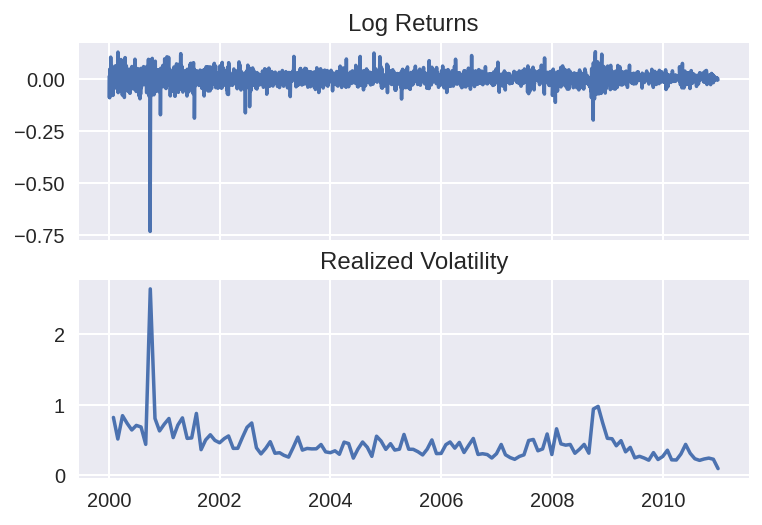

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True)#create two plots by sharing x axis 
ax[0].plot(df)#plot the log returns
ax[0].title.set_text('Log Returns')#set title as Log returns
ax[1].plot(df_rv)#plot the  realized volatality
ax[1].title.set_text('Realized Volatility')#set title  as Realized volatility
plt.show()#show the plot

#**Visualize Time series data**

In [ ]:
# download data as pandas DataFrame
df = yf.download('MSFT', auto_adjust = False, progress=False)#download microsoft dataframe
df = df.loc[:, ['Adj Close']]#keep only adjusted close
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)#rename adjusted close


df['simple_rtn'] = df.adj_close.pct_change()#create simple returns
df['log_rtn'] = np.log(df.adj_close / df.adj_close.shift(1))#create log returns

# dropping NA's in the first row
df.dropna(how = 'any', inplace = True)

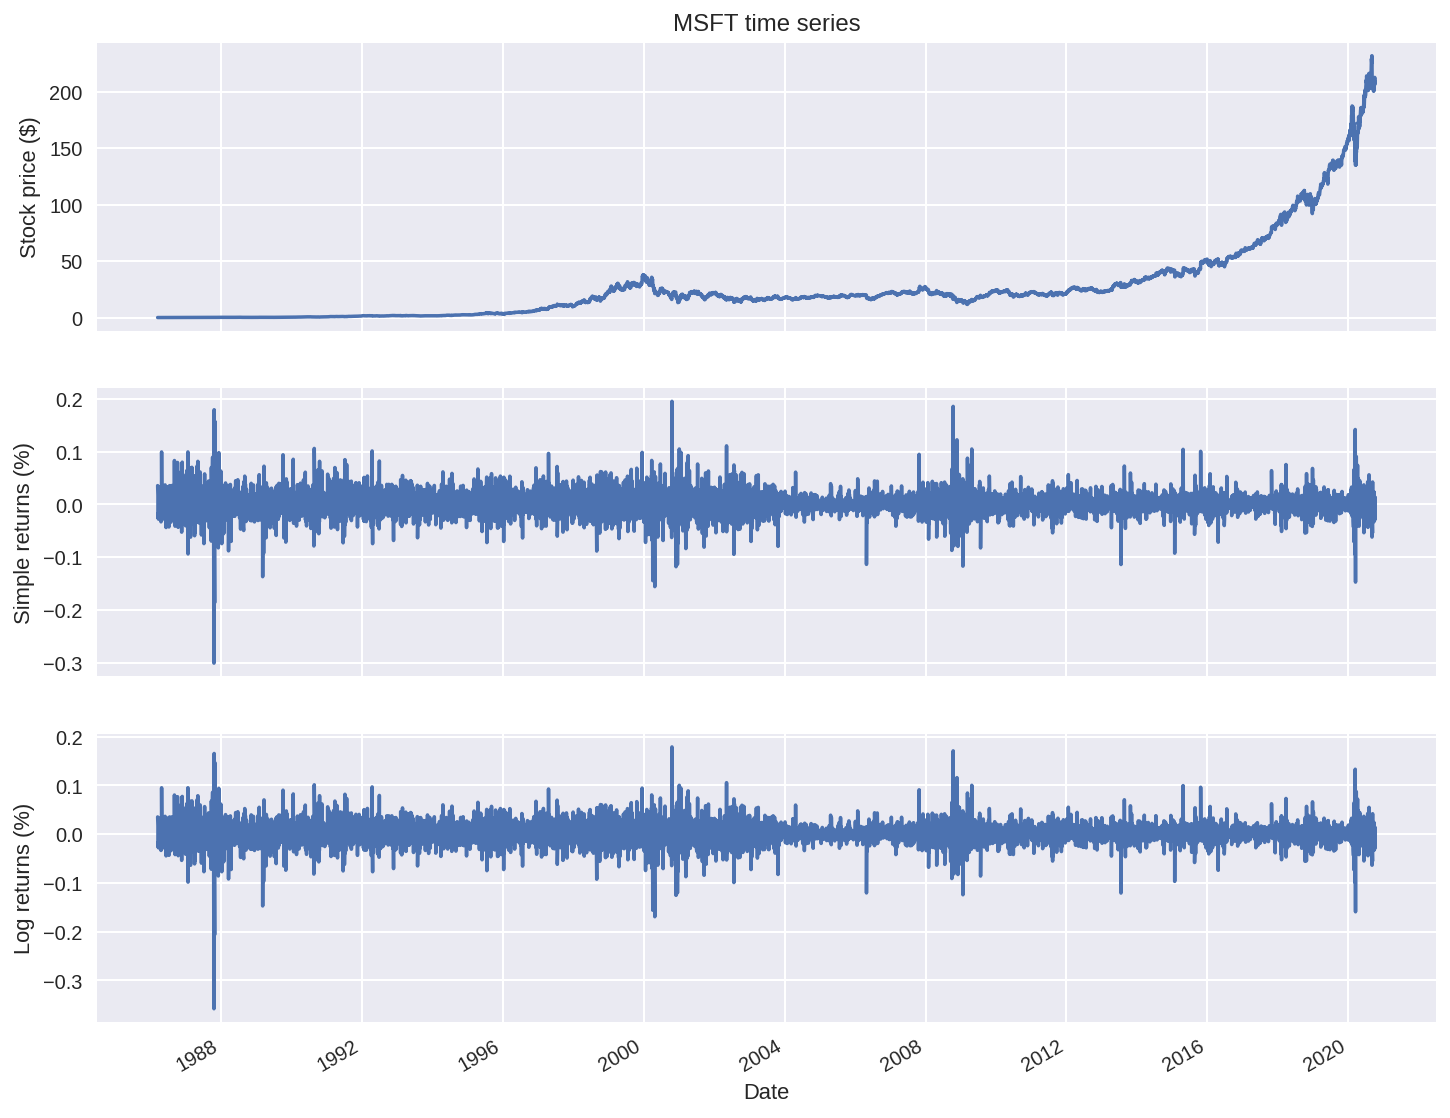

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)#create 3 subplots

# add prices
df.adj_close.plot(ax=ax[0])#adjusted closing price on first plot
ax[0].set(title = 'MSFT time series',
          ylabel = 'Stock price ($)')#set title and y label
    

df.simple_rtn.plot(ax=ax[1])#simple returns on  second plot
ax[1].set(ylabel = 'Simple returns (%)')#add y label 

df.log_rtn.plot(ax=ax[2])#log returns on third plot 
ax[2].set(xlabel = 'Date', 
          ylabel = 'Log returns (%)')#add x label and y label

plt.show()

#**Identifying Outliers**

* While working with any kind of data, we often encounter observations that are
significantly different from the majority, that is, **outliers.**
*  They can be a result of a wrong
tick (price), something major happening on the financial markets, an error in the data
processing pipeline, and so on.
* Many machine learning algorithms and statistical
approaches can be influenced by outliers, leading to incorrect/biased results. 
* That is why
we should handle the outliers before creating any models

In [ ]:
#download apple dataset
df = yf.download('AAPL', 
                 start='2000-01-01', 
                 end='2010-12-31',
                 progress=False)
#keep only adjusted close
df = df.loc[:, ['Adj Close']]
#rename colums
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [ ]:
#calculate simple return
df['simple_rtn'] = df.adj_close.pct_change()

In [ ]:
#print first 5 rows
df.head()

,adj_close,simple_rtn
Date,,
2000-01-03,0.863657,NaN
2000-01-04,0.790842,-0.084311
2000-01-05,0.802415,0.014634
2000-01-06,0.732975,-0.086539
2000-01-07,0.767695,0.047368


In [ ]:
df_rolling = df[['simple_rtn']].rolling(window=21).agg(['mean', 'std'])#calculate rolling mean and std

In [ ]:
df_rolling.columns = df_rolling.columns.droplevel()#dropping level 1 column name which is simple return

In [ ]:
df_outliers = df.join(df_rolling)#join with df

In [ ]:
df_outliers.head()#print first 5 rows

,adj_close,simple_rtn,mean,std
Date,,,,
2000-01-03,0.863657,NaN,NaN,NaN
2000-01-04,0.790842,-0.084311,NaN,NaN
2000-01-05,0.802415,0.014634,NaN,NaN
2000-01-06,0.732975,-0.086539,NaN,NaN
2000-01-07,0.767695,0.047368,NaN,NaN


In [ ]:
#detect outliers 
#In normal distribution abouyt 99% of data falls within 3 std distance
#if our data is greater than 3 std it is detected  as outliers
#this function returns 1 if outlier else 0
def indentify_outliers(row, n_sigmas=3):
  
    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']
    
    if (x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0 

In [ ]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, 
                                           axis=1)#apply the outlier detevction function
outliers = df_outliers.loc[df_outliers['outlier'] == 1,['simple_rtn']]#get the simple returns of outliers

In [ ]:
outliers.head()#print first 5 rows

,simple_rtn
Date,
2000-09-29,-0.518692
2000-12-06,-0.158088
2001-07-18,-0.171713
2002-06-19,-0.150372
2003-04-11,-0.081419


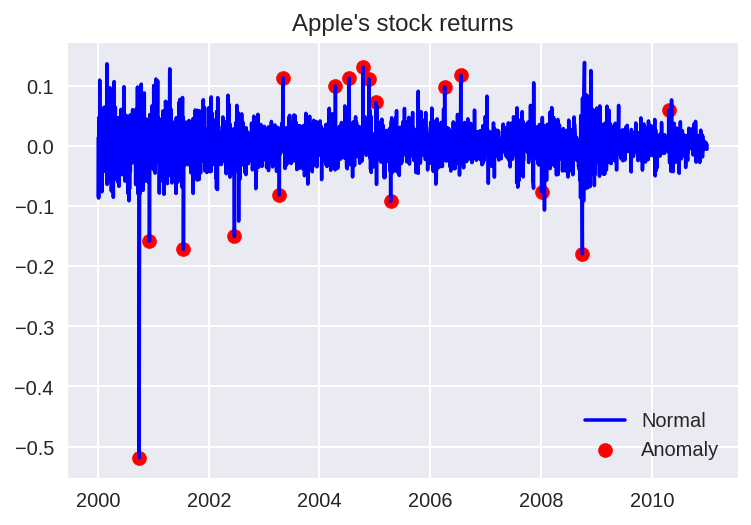

In [ ]:
fig, ax = plt.subplots()#create subplots

ax.plot(df_outliers.index, df_outliers.simple_rtn, 
        color='blue', label='Normal')#x axis has index of df_outliers ,y axis has simple returns label as normal,
ax.scatter(outliers.index, outliers.simple_rtn, 
           color='red', label='Anomaly')#plots the outliers and label as anamoly
ax.set_title("Apple's stock returns")#set title
ax.legend(loc='lower right')#legends as lower right
plt.show()

#**Stylized facts of Asset Returns**

* **Stylized facts** are statistical properties that appear to be present in many empirical asset
returns (across time and markets). 
* It is important to be aware of them because when we are
building models that are supposed to represent asset price dynamics, the models must be
able to capture/replicate these properties.

In [ ]:
import seaborn as sns #Seaborn is a library for making statistical graphics in Python
import scipy.stats as scs #This module contains a large number of probability distributions as well as a growing library of statistical functions. 
import statsmodels.api as sm #statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration
import statsmodels.tsa.api as smt #statsmodel time series analysis module for statistics of timer series data

In [ ]:
#download s&p 500  prices
df = yf.download('^GSPC', 
                 start='1985-01-01', 
                 end='2018-12-31',
                 progress=False)
#keep adjusted closing price and rename columns
df = df[['Adj Close']].rename(columns={'Adj Close': 'adj_close'})
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))#calculate log returns
df = df[['adj_close', 'log_rtn']].dropna(how = 'any')#drop null values

In [ ]:
r_range = np.linspace(min(df.log_rtn), max(df.log_rtn), num=1000)
mu = df.log_rtn.mean()
sigma = df.log_rtn.std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)   

**Fact 1:Non-Gaussian Distribution of Returns**

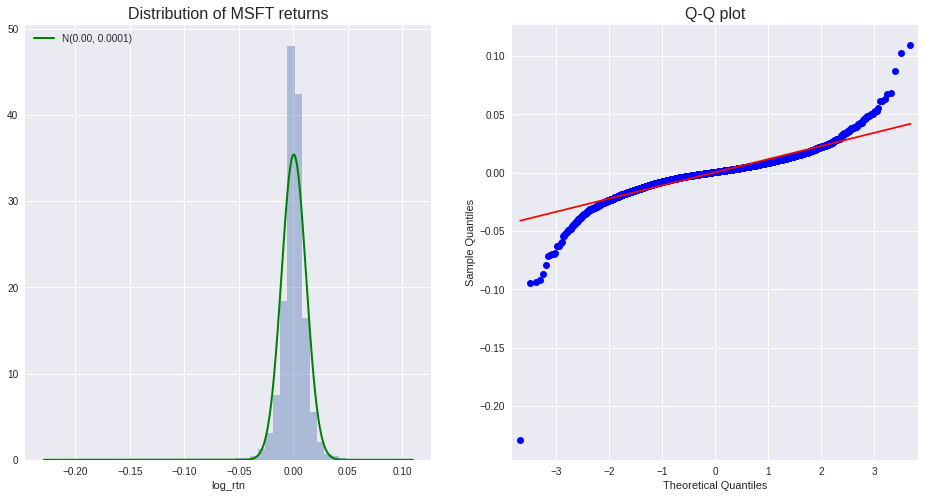

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))#create subplots

# histogram
sns.distplot(df.log_rtn, kde=False, norm_hist=True, ax=ax[0]) #create distplot of log returns                            
ax[0].set_title('Distribution of MSFT returns', fontsize=16) #                                                   
ax[0].plot(r_range, norm_pdf, 'g', lw=2, 
           label=f'N({mu:.2f}, {sigma**2:.4f})')#plot the non-gaussian disttibution
ax[0].legend(loc='upper left')#plot legend

# Q-Q plot
qq = sm.qqplot(df.log_rtn.values, line='s', ax=ax[1])#plot qq plot
ax[1].set_title('Q-Q plot', fontsize = 16)#set title

# plt.tight_layout()
# plt.savefig('images/ch1_im10.png')
plt.show()

In [ ]:
jb_test = scs.jarque_bera(df.log_rtn.values)#jarque bera statistics

print('---------- Descriptive Statistics ----------')
print('Range of dates:', min(df.index.date), '-', max(df.index.date))#min and max date
print('Number of observations:', df.shape[0])#shape of log returns
print(f'Mean: {df.log_rtn.mean():.4f}')#mean of log returns
print(f'Median: {df.log_rtn.median():.4f}')#medain of log returns
print(f'Min: {df.log_rtn.min():.4f}')#minimum of log returns
print(f'Max: {df.log_rtn.max():.4f}')#maximum of log returns
print(f'Standard Deviation: {df.log_rtn.std():.4f}')#std of log returns
print(f'Skewness: {df.log_rtn.skew():.4f}')#skewness of log returns
print(f'Kurtosis: {df.log_rtn.kurtosis():.4f}') #kurtosis of log returns
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')#jarque bera stats  with p value

---------- Descriptive Statistics ----------
Range of dates: 1985-01-03 - 2018-12-28
Number of observations: 8568
Mean: 0.0003
Median: 0.0006
Min: -0.2290
Max: 0.1096
Standard Deviation: 0.0113
Skewness: -1.2628
Kurtosis: 28.0156
Jarque-Bera statistic: 282134.38 with p-value: 0.00


* The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. .

**Insights**

* By looking at the metrics such as the mean, standard deviation, skewness, and
kurtosis we can infer that they **deviate** from what we would expect under
normality. 
* Additionally, the Jarque-Bera normality test gives us reason to **reject
the null hypothesis** stating that the distribution is normal at the 99% confidence
level.

**Fact 2:Volatility Clustering**

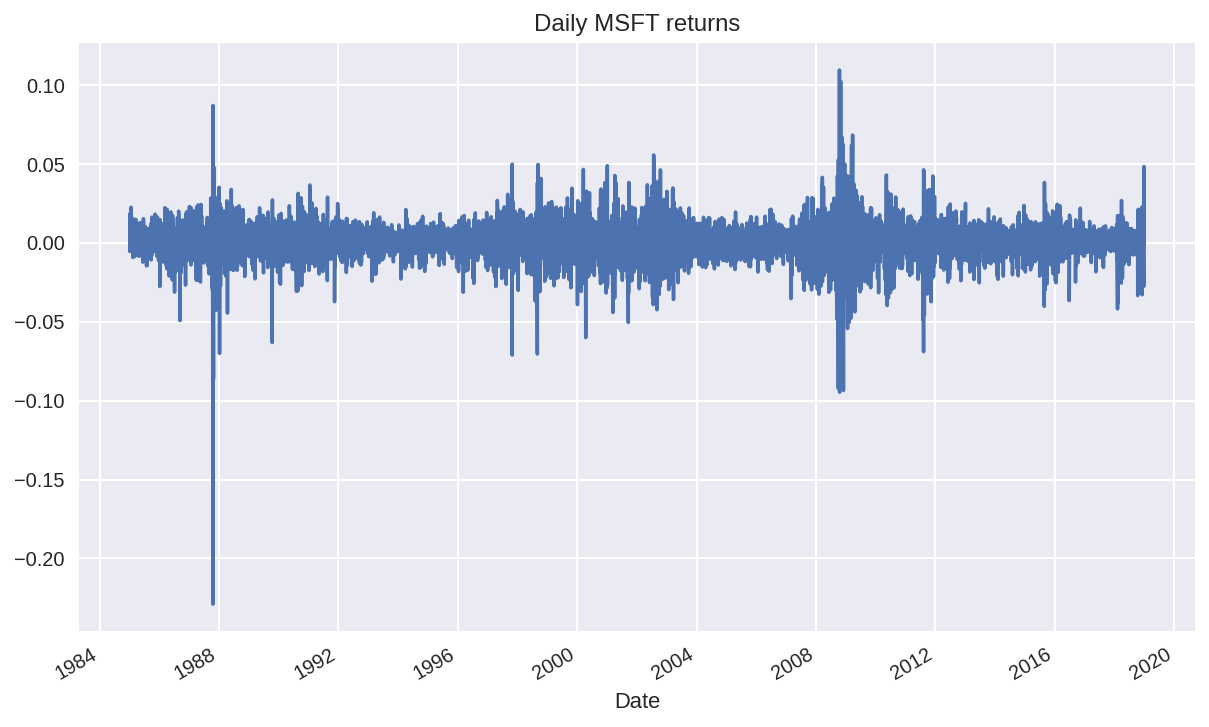

In [ ]:
df.log_rtn.plot(title='Daily MSFT returns', figsize=(10, 6))#log return plot
plt.show()#show plot

* We can observe clear clusters of volatility—periods of higher positive and
negative returns. 
* Volatility is not constant.

**Fact 3:Absence of autocorrelation in returns**

* **Autocorrelation** (also known as serial correlation) measures how similar is a given time
series to the lagged version of itself, over successive time intervals.

In [ ]:
N_LAGS = 50#specify lags
SIGNIFICANCE_LEVEL = 0.05#95% confidence interval

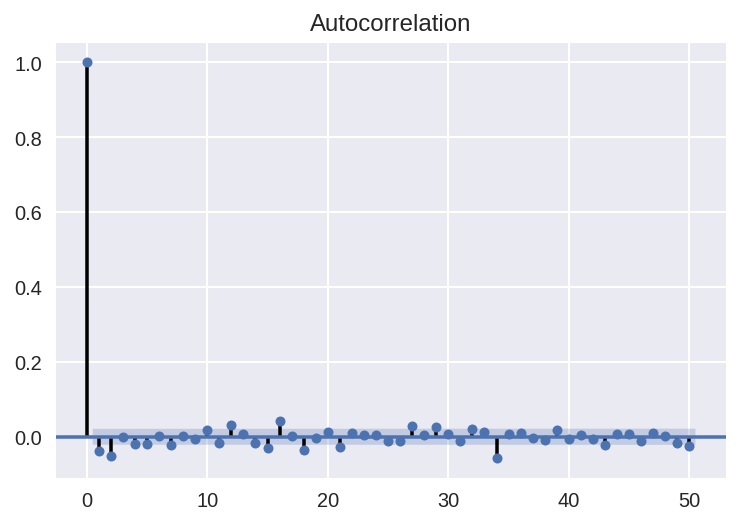

In [ ]:
acf = smt.graphics.plot_acf(df.log_rtn, 
                            lags=N_LAGS, 
                            alpha=SIGNIFICANCE_LEVEL)#plot acf graph
plt.show()#show the plot

* Only a **few values lie outside the confidence interval** (we do not look at lag 0) and
can be considered statistically significant. 
* We can assume that we have verified
that there is **no autocorrelation** in the log returns series.

**Fact 4:Small and decreasing autocorrelation in
squared/absolute returns**

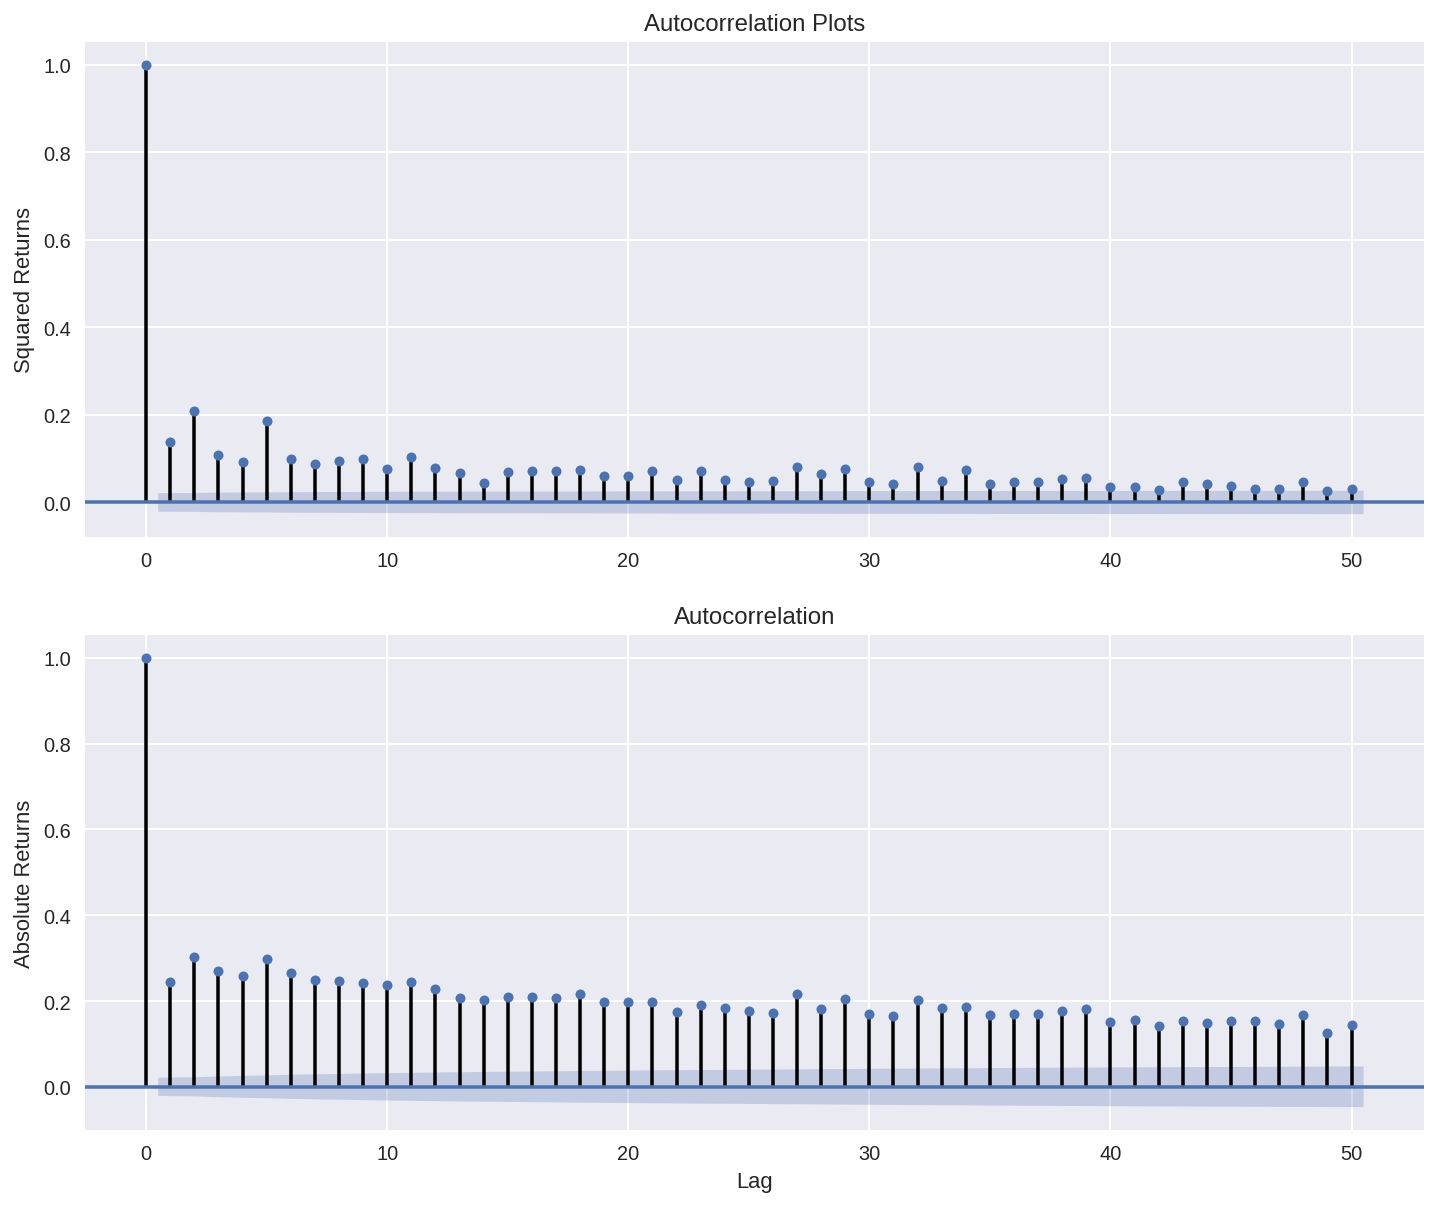

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))#create subplots

smt.graphics.plot_acf(df.log_rtn ** 2, lags=N_LAGS, 
                      alpha=SIGNIFICANCE_LEVEL, ax = ax[0])#squared log returns
ax[0].set(title='Autocorrelation Plots',
          ylabel='Squared Returns')#set labels

smt.graphics.plot_acf(np.abs(df.log_rtn), lags=N_LAGS, 
                      alpha=SIGNIFICANCE_LEVEL, ax = ax[1])#absolute log returns
ax[1].set(ylabel='Absolute Returns',#set title
          xlabel='Lag')

plt.show()

* We can observe the **small and decreasing values of autocorrelation** for the
squared and absolute returns, which are in line with the fourth stylized fact. 

**Fact 5:Investigate Leverage Effect**

* **Leverage effect** measures aim to quantify how much business **risk** a given company is currently experiencing.

In [ ]:
df['moving_std_252'] = df[['log_rtn']].rolling(window=252).std()#rollin std of 252
df['moving_std_21'] = df[['log_rtn']].rolling(window=21).std()#rolling std of 21

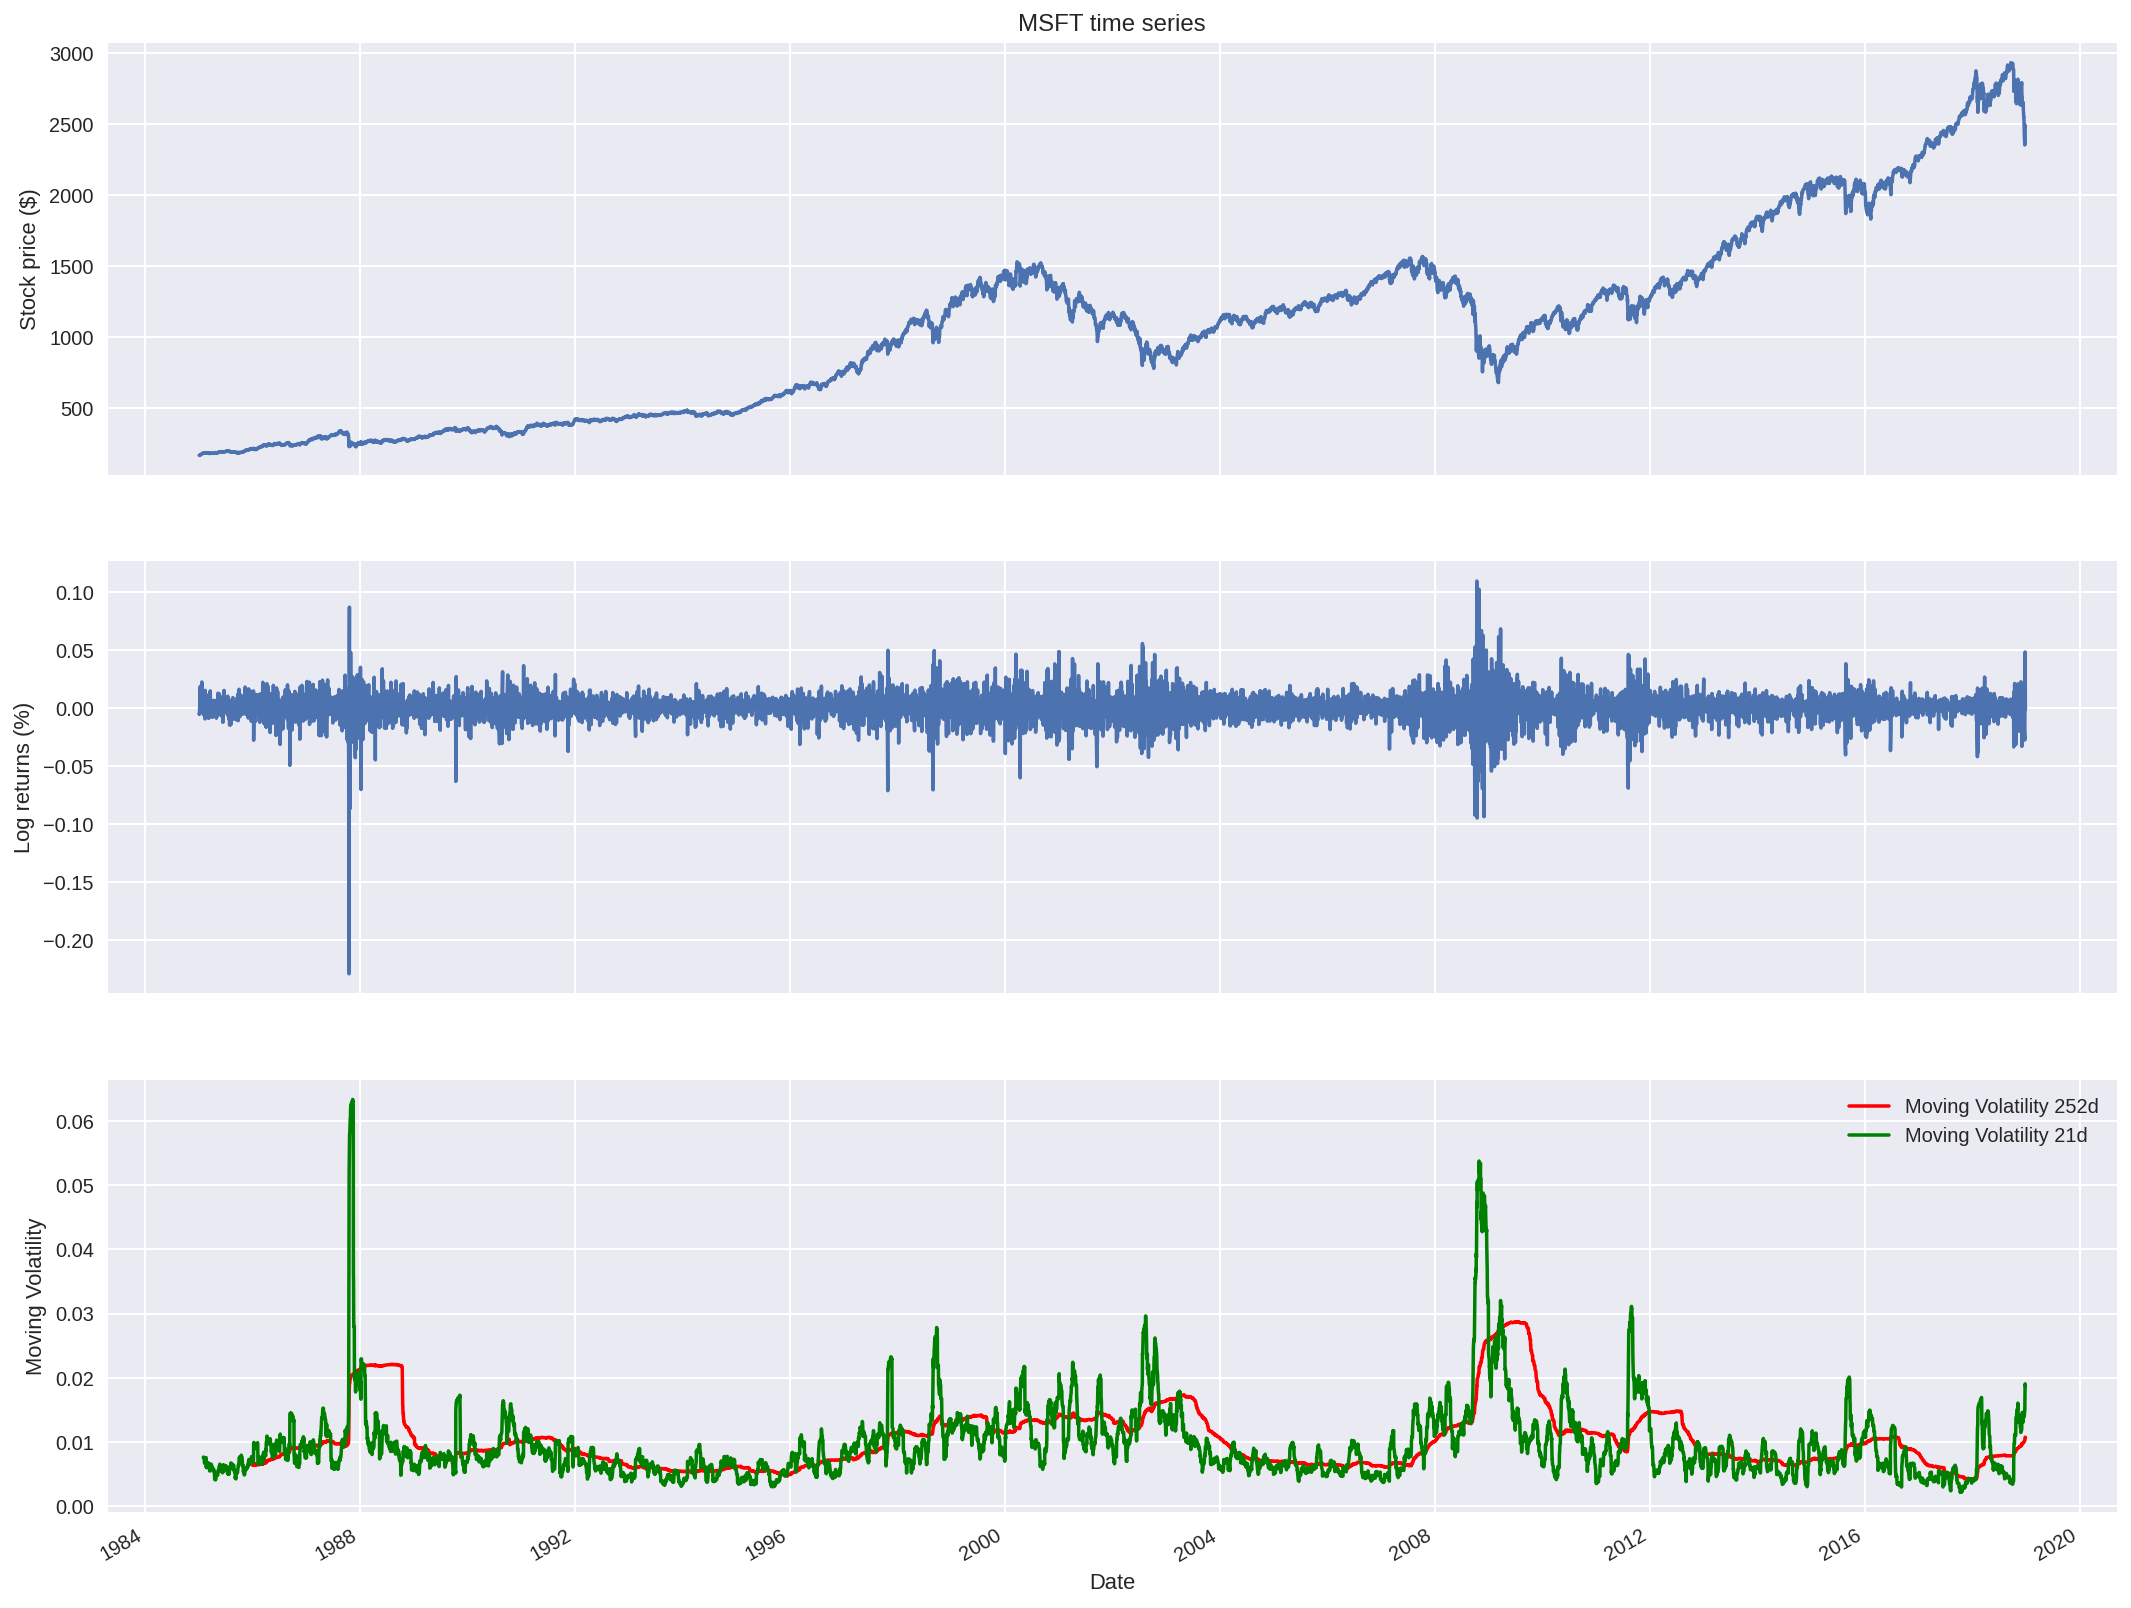

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(18, 15), 
                       sharex=True)#create subplots

df.adj_close.plot(ax=ax[0])#create adjusted closing price plot
ax[0].set(title='MSFT time series',
          ylabel='Stock price ($)')#set title and label
 
df.log_rtn.plot(ax=ax[1])#log returns plot
ax[1].set(ylabel='Log returns (%)')#set y label

df.moving_std_252.plot(ax=ax[2], color='r', 
                       label='Moving Volatility 252d')#plot moving average of year
df.moving_std_21.plot(ax=ax[2], color='g', 
                      label='Moving Volatility 21d')#plot moving average of month
ax[2].set(ylabel='Moving Volatility',
          xlabel='Date')#set labels
ax[2].legend()#set legend

plt.show()#show plot

* This fact states that most measures of an asset's volatility are negatively correlated
with its returns, and we can indeed observe a pattern of increased volatility when
the prices go down and decreased volatility when they are rising. 

**More on Leveraging Effects**

* **VIX (CBOE Volatility Index)**, which is a popular metric of the stock market's expectation
regarding **volatility.**

In [ ]:
df = yf.download(['^GSPC', '^VIX'], 
                 start='1985-01-01', 
                 end='2018-12-31',
                 progress=False)#Download s&p 500 and VIX data
df = df[['Adj Close']]#get adj close
df.columns = df.columns.droplevel(0)#drop level 0
df = df.rename(columns={'^GSPC': 'sp500', '^VIX': 'vix'})#rename columns

In [ ]:
df['log_rtn'] = np.log(df.sp500 / df.sp500.shift(1))#calculate log returns
df['vol_rtn'] = np.log(df.vix / df.vix.shift(1))#calculate volatility returns
df.dropna(how='any', axis=0, inplace=True)#drop null values

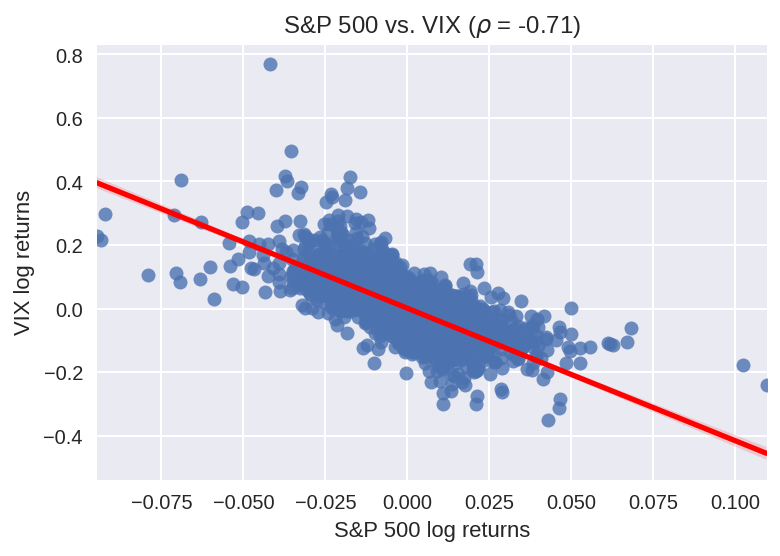

In [ ]:
corr_coeff = df.log_rtn.corr(df.vol_rtn)#calculate correlation between log returns and volatility returns

ax = sns.regplot(x='log_rtn', y='vol_rtn', data=df, 
                 line_kws={'color': 'red'})#regression plot with  x-axis as log return and y as volatility returs
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',
       ylabel='VIX log returns',
       xlabel='S&P 500 log returns')#set title,label 

plt.show()

* We can see that both the **negative slope of the regression line** and a strong **negative correlation** between the two series confirm the existence of the **leverage
effect** in the return series.